In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,ElasticNet,ElasticNetCV,Ridge,RidgeCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
scaler=StandardScaler()
linear=LinearRegression()
lasso=Lasso()
lasscv=LassoCV()
elastic=ElasticNet()
elasticv=ElasticNetCV()
rid=Ridge()
ridcv=RidgeCV()

In [3]:
df=pd.read_csv('data_cleaned.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [5]:
df.drop(columns=['day','month','year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [8]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [9]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [10]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [12]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [13]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

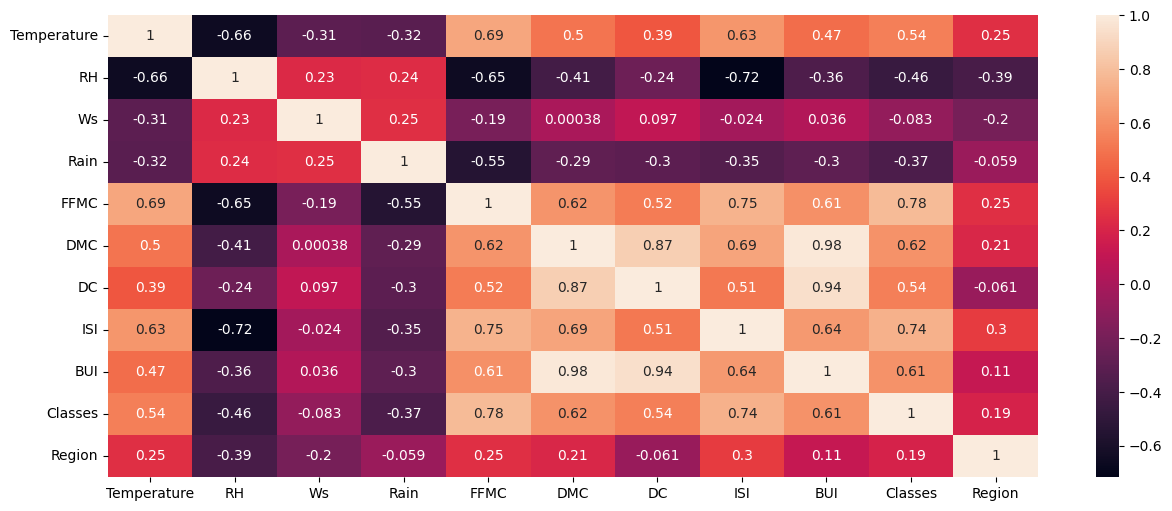

In [14]:
plt.figure(figsize=(15,6))
sns.heatmap(x_train.corr(),annot=True)

In [15]:
def drop_column(dataset,frequency):
    col_name=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>frequency:
                colname=corr_matrix.columns[i]
                col_name.add(colname)
    return col_name


In [16]:
dop_col=drop_column(x_train,0.85)
dop_col

{'BUI', 'DC'}

In [17]:
x_train.drop(dop_col,axis=1,inplace=True)
x_test.drop(dop_col,axis=1,inplace=True)

In [18]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


In [19]:
x_test

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1
...,...,...,...,...,...,...,...,...,...
162,34,56,15,2.9,74.8,7.1,1.6,0,1
178,33,57,16,0.0,87.5,15.7,6.7,1,1
224,31,72,14,0.0,84.2,8.3,3.8,1,1
230,36,33,13,0.1,90.6,25.8,9.0,1,1


In [20]:
x_train_standard=scaler.fit_transform(x_train)
x_test_standard=scaler.transform(x_test)

<Axes: >

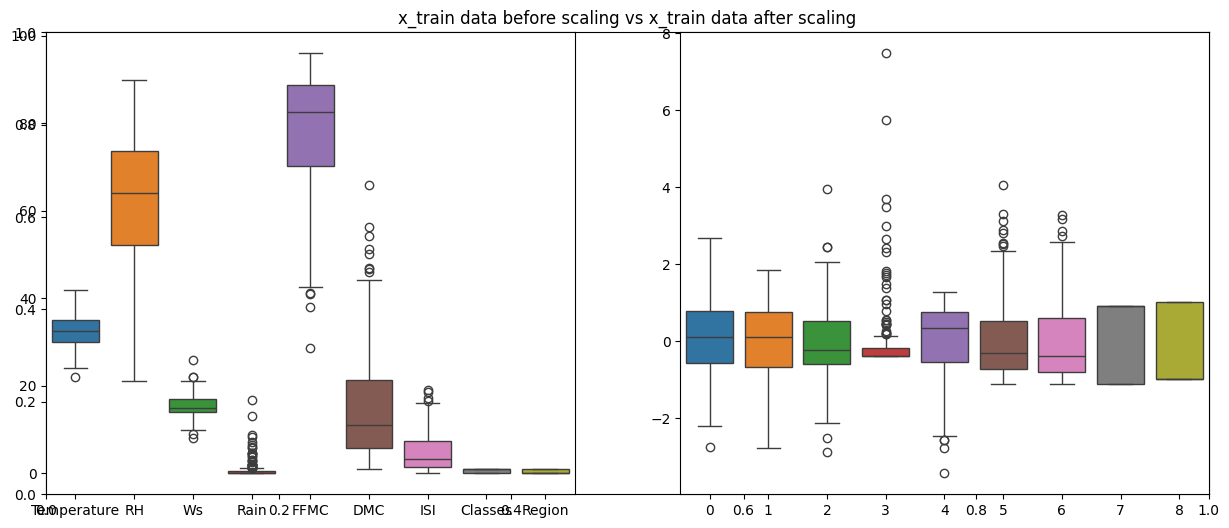

In [21]:
plt.figure(figsize=(15,6))
plt.title("x_train data before scaling vs x_train data after scaling")
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.subplot(1,2,2)
sns.boxplot(data=x_train_standard)

the mean absolute error value is :  0.5468236465249978
the mean squared error is :  0.6742766873791581
the root squared mean error is :  0.8211435242265253
r2 score is :  0.9847657384266951
Adjusted R2 score is : 0.9870508776626908


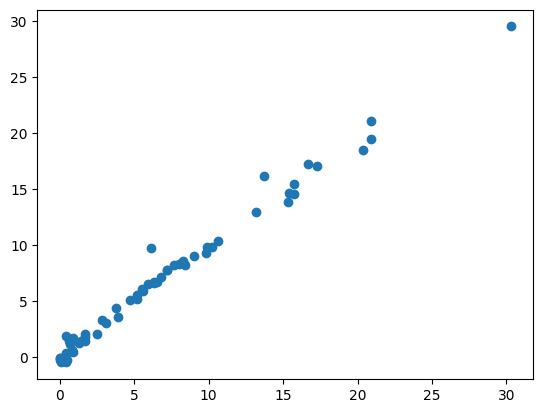

In [22]:
linear.fit(x_train_standard,y_train)
y_pred=linear.predict(x_test_standard)
plt.scatter(y_test,y_pred)
print("the mean absolute error value is : ",mean_absolute_error(y_test,y_pred))
print("the mean squared error is : ",mean_squared_error(y_test,y_pred))
print("the root squared mean error is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is : ",r2_score(y_test,y_pred))
print("Adjusted R2 score is :", 1 - (1 - r2_score(y_test, y_pred)) * ((len(y_test) - x_test.shape[1] - 1) / (len(y_test) - 1)))


the mean absolute error value is :  1.133175994914409
the mean squared error is :  2.2483458918974772
the root squared mean error is :  1.4994485292591664
r2 score is :  0.9492020263112388
Adjusted R2 score is : 0.956821722364553


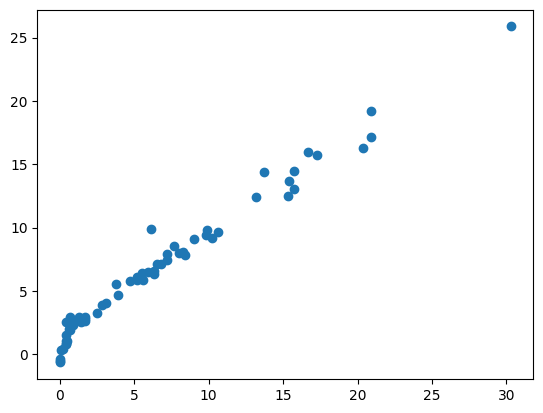

In [23]:
lasso.fit(x_train_standard,y_train)
y_pred=lasso.predict(x_test_standard)
plt.scatter(y_test,y_pred)
print("the mean absolute error value is : ",mean_absolute_error(y_test,y_pred))
print("the mean squared error is : ",mean_squared_error(y_test,y_pred))
print("the root squared mean error is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is : ",r2_score(y_test,y_pred))
print("Adjusted R2 score is :", 1 - (1 - r2_score(y_test, y_pred)) * ((len(y_test) - x_test.shape[1] - 1) / (len(y_test) - 1)))

the mean absolute error value is :  0.6199701158263432
the mean squared error is :  0.7924995554743622
the root squared mean error is :  0.8902244410677356
r2 score is :  0.9820946715928275
Adjusted R2 score is : 0.9847804708539034


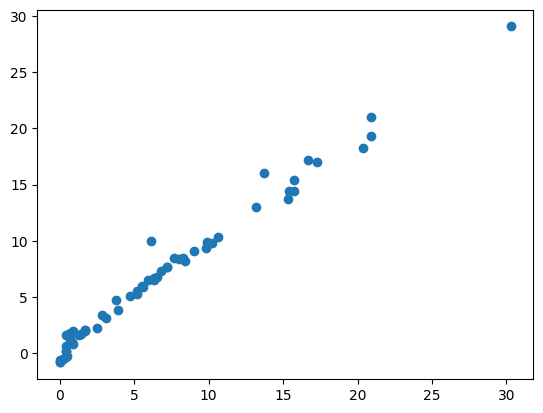

In [24]:
lasscv.fit(x_train_standard,y_train)
y_pred=lasscv.predict(x_test_standard)
plt.scatter(y_test,y_pred)
print("the mean absolute error value is : ",mean_absolute_error(y_test,y_pred))
print("the mean squared error is : ",mean_squared_error(y_test,y_pred))
print("the root squared mean error is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is : ",r2_score(y_test,y_pred))
print("Adjusted R2 score is :", 1 - (1 - r2_score(y_test, y_pred)) * ((len(y_test) - x_test.shape[1] - 1) / (len(y_test) - 1)))

the mean absolute error value is :  0.5642305340105717
the mean squared error is :  0.6949198918152093
the root squared mean error is :  0.8336185529456559
r2 score is :  0.9842993364555512
Adjusted R2 score is : 0.9866544359872186


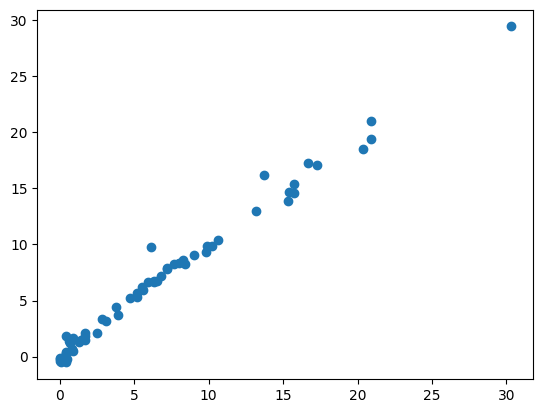

In [25]:
rid.fit(x_train_standard,y_train)
y_pred=rid.predict(x_test_standard)
plt.scatter(y_test,y_pred)
print("the mean absolute error value is : ",mean_absolute_error(y_test,y_pred))
print("the mean squared error is : ",mean_squared_error(y_test,y_pred))
print("the root squared mean error is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is : ",r2_score(y_test,y_pred))
print("Adjusted R2 score is :", 1 - (1 - r2_score(y_test, y_pred)) * ((len(y_test) - x_test.shape[1] - 1) / (len(y_test) - 1)))

the mean absolute error value is :  0.5642305340106782
the mean squared error is :  0.6949198918151094
the root squared mean error is :  0.833618552945596
r2 score is :  0.9842993364555536
Adjusted R2 score is : 0.9866544359872206


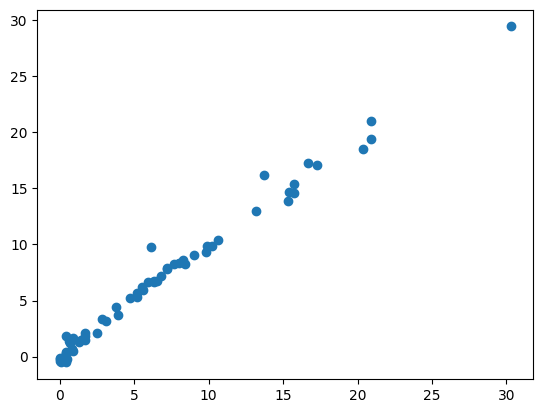

In [26]:
ridcv.fit(x_train_standard,y_train)
y_pred=ridcv.predict(x_test_standard)
plt.scatter(y_test,y_pred)
print("the mean absolute error value is : ",mean_absolute_error(y_test,y_pred))
print("the mean squared error is : ",mean_squared_error(y_test,y_pred))
print("the root squared mean error is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is : ",r2_score(y_test,y_pred))
print("Adjusted R2 score is :", 1 - (1 - r2_score(y_test, y_pred)) * ((len(y_test) - x_test.shape[1] - 1) / (len(y_test) - 1)))

the mean absolute error value is :  1.8822353634896
the mean squared error is :  5.517251101025224
the root squared mean error is :  2.3488829474933874
r2 score is :  0.8753460589519703
Adjusted R2 score is : 0.8940441501091747


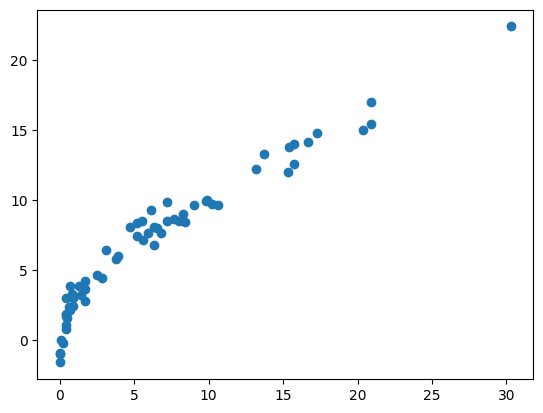

In [27]:
elastic.fit(x_train_standard,y_train)
y_pred=elastic.predict(x_test_standard)
plt.scatter(y_test,y_pred)
print("the mean absolute error value is : ",mean_absolute_error(y_test,y_pred))
print("the mean squared error is : ",mean_squared_error(y_test,y_pred))
print("the root squared mean error is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is : ",r2_score(y_test,y_pred))
print("Adjusted R2 score is :", 1 - (1 - r2_score(y_test, y_pred)) * ((len(y_test) - x_test.shape[1] - 1) / (len(y_test) - 1)))

the mean absolute error value is :  0.6575946731430897
the mean squared error is :  0.8222830416276257
the root squared mean error is :  0.9067982364493359
r2 score is :  0.9814217587854941
Adjusted R2 score is : 0.9842084949676699


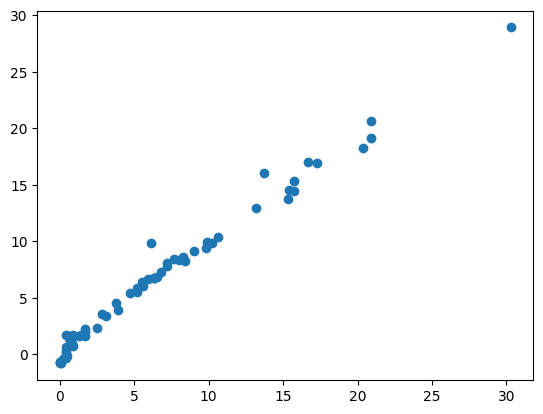

In [28]:
elasticv.fit(x_train_standard,y_train)
y_pred=elasticv.predict(x_test_standard)
plt.scatter(y_test,y_pred)
print("the mean absolute error value is : ",mean_absolute_error(y_test,y_pred))
print("the mean squared error is : ",mean_squared_error(y_test,y_pred))
print("the root squared mean error is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is : ",r2_score(y_test,y_pred))
print("Adjusted R2 score is :", 1 - (1 - r2_score(y_test, y_pred)) * ((len(y_test) - x_test.shape[1] - 1) / (len(y_test) - 1)))

In [29]:
import pickle

In [30]:
pickle.dump(linear,open('linear.pkl','wb'))
linear_model=pickle.load(open('linear.pkl','rb'))


In [32]:
pickle.dump(scaler,open('scaler.pkl','wb'))
scaler_model=pickle.load(open('scaler.pkl','rb'))